<a href="https://colab.research.google.com/github/AnuragRao1/PredictMusicGenre/blob/main/PredictMusicGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

#download dataset
! kaggle datasets download vicsuperman/prediction-of-music-genre
! unzip prediction-of-music-genre.zip

df = pd.read_csv("music_genre.csv")
df


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
prediction-of-music-genre.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  prediction-of-music-genre.zip
replace music_genre.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [6]:
#CLEAN DATASET
#drop unnecessary columns
df.drop(['instance_id','artist_name','track_name','key','mode','obtained_date'], inplace = True, axis = 1)
df

#drop outlier rows where duration_ms = -1
df.drop(df[df['duration_ms'] == -1.0].index, inplace = True)
df

#drop outlier rows where tempo = ?
df.drop(df[df['tempo'] == '?'].index, inplace = True)
df

#dropping null rows
df.isnull().sum()
df.drop(df[df.isnull().any(axis=1)].index, inplace = True)
df


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
49999,56.0,0.13300,0.849,237667.0,0.660,0.000008,0.296,-7.195,0.0516,99.988,0.629,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.000000,0.109,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.000000,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.000000,0.106,-5.016,0.0441,75.88600000000001,0.354,Hip-Hop


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 1 to 50004
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        40560 non-null  float64
 1   acousticness      40560 non-null  float64
 2   danceability      40560 non-null  float64
 3   duration_ms       40560 non-null  float64
 4   energy            40560 non-null  float64
 5   instrumentalness  40560 non-null  float64
 6   liveness          40560 non-null  float64
 7   loudness          40560 non-null  float64
 8   speechiness       40560 non-null  float64
 9   tempo             40560 non-null  object 
 10  valence           40560 non-null  float64
 11  music_genre       40560 non-null  object 
dtypes: float64(10), object(2)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 1 to 50004
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            -

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.5631848566756203

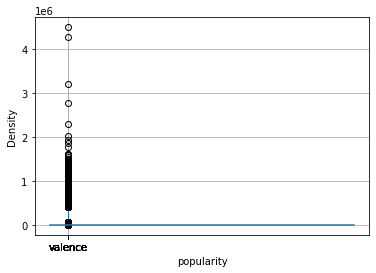

In [7]:
from seaborn.matrix import heatmap
from numpy.ma.core import correlate
#EDA
df.info()
df.describe()

#convert tempo column into a floater
df['tempo'] = pd.to_numeric(df['tempo'])
df.info()


#finding variables with many outliers
ammended_df = df.loc[:, df.columns != 'music_genre'] #get df without music_genre column
len(ammended_df.columns)
for i in range(1,11):
    ammended_df.boxplot(column = ammended_df.columns[i])  #popularity,instrumentalness,duration_ms,liveness,loudness,speechiness many outliers



#histogram
sns.distplot(df['popularity'])
df['tempo'].skew()
df['tempo'].kurt()




In [8]:
#MODEL
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=0) #splits data
numcat = df.columns[0:11] #takes numerical categories
numcat

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [9]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth= 25000)
dtc.fit(train[numcat], train['music_genre'].values.reshape(-1,1))
dtc.score(train[numcat],train['music_genre']) 
dtc.score(test[numcat],test['music_genre']) 

0.4357741617357002

In [10]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forst = RandomForestClassifier(n_estimators = 300)
forst.fit(train[numcat],train['music_genre'])
forst.score(train[numcat],train['music_genre'])
forst.score(test[numcat],test['music_genre'])


0.5499260355029586

In [11]:
#Gradient Boosted trees
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(train[numcat],train['music_genre'])
grad.score(train[numcat],train['music_genre']) 
grad.score(test[numcat],test['music_genre'])


0.5797583826429981

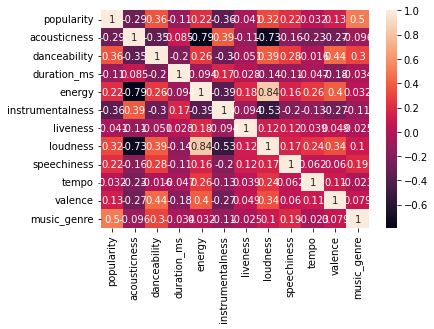

In [12]:
###More data analysis
#convert music_genre into integer values
from sklearn.preprocessing import OrdinalEncoder
dfn = df.copy()
dfn[['music_genre']] = OrdinalEncoder().fit_transform(dfn[['music_genre']])

#finding most correlated variables
corrmap = dfn.corr()
feature = corrmap.index

#plot heat map
sns.heatmap(dfn[feature].corr(), annot = True)
corrmap['music_genre']


# this gives us the most correlated variables of danceability, popularity,loudness,speechiness, instrumentalness, acousticness
good_features = ['danceability','popularity','loudness','speechiness','instrumentalness', 'acousticness','music_genre']




In [13]:
##Build new model with heavily correlated variables
train_g = train[good_features]
test_g = test[good_features]
numgf = train_g.columns[1:6] #takes numerical columns


In [14]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth= 25000)
dtc1.fit(train_g[numgf], train_g['music_genre'])
dtc1.score(train_g[numgf], train_g['music_genre']) 
dtc1.score(test_g[numgf], test_g['music_genre']) 


0.3793145956607495

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{'Electronic': {'acousticness': 4.099766687180679,
  'danceability': 0.08527001395809952,
  'duration_ms': 414.03603483610556,
  'energy': -0.22106979705202745,
  'instrumentalness': -1.5270406790992446,
  'liveness': 3.199433600051966,
  'loudness': 1.0652787921881042,
  'speechiness': 6.285820720324347,
  'tempo': -0.20458934272588003,
  'valence': -0.6663696052498058},
 'Anime': {'acousticness': -0.7415366058654769,
  'danceability': -0.24164305611280845,
  'duration_ms': 13.32533933863214,
  'energy': -0.8186396529466813,
  'instrumentalness': -1.164368307864667,
  'liveness': 5.023946997469145,
  'loudness': 2.6453515333684656,
  'speechiness': 11.410500177677424,
  'tempo': -0.785217104608809,
  'valence': -0.9265766376496165},
 'Jazz': {'acousticness': -1.4694709338850294,
  'danceability': -0.39594880399576615,
  'duration_ms': 9.878131727586794,
  'energy': -0.8597404641268751,
  'instrumentalness': -1.6263063392598471,
  'liveness': 7.5567881818962315,
  'loudness': 1.5782721

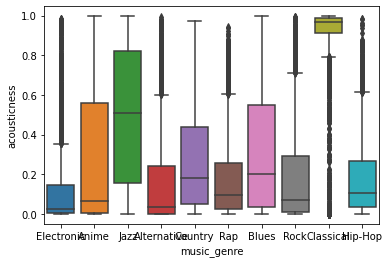

In [15]:
#Genre data analysis
#simplify problem, pull genres
output = []
for x in df['music_genre']:
  if x not in output:
    output.append(x)
output

#genre analysis

#boxplot by genre
sns.boxplot(df['music_genre'],df['acousticness'])

#skew by genre and attribute
genskew = {}
col = df.columns.values[1:11]
col
for x in output:
  genskew[x] = {}
  for y in col:
    xdf = df[df['music_genre'] == x]
    genskew[x][y] = xdf[y].skew()
genskew

#kurtosis by genre and attribute
genkurt = {}
for x in output:
  genkurt[x] = {}
  for y in col:
    xdf = df[df['music_genre'] == x]
    genkurt[x][y] = xdf[y].kurt()
genkurt

In [16]:
#create a dataframe for ridding genres
df_genre = df.copy()
df_genre.drop(df_genre[df_genre['music_genre'] == 'Hip-Hop'].index, inplace = True)
df_genre

#train/test split
train_genre, test_genre = train_test_split(df_genre, test_size = 0.2, random_state=0) 
numcat = df_genre.columns[0:11] #takes numerical categories

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc_genre = DecisionTreeClassifier(max_depth= 25000)
dtc_genre.fit(train_genre[numgf], train_genre['music_genre'])
dtc_genre.score(train_genre[numgf], train_genre['music_genre'])
dtc_genre.score(test_genre[numgf], test_genre['music_genre']) 


0.4518295189804029

In [18]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forst = RandomForestClassifier(n_estimators = 300)
forst.fit(train_genre[numgf], train_genre['music_genre'])
forst.score(train_genre[numgf], train_genre['music_genre'])
forst.score(test_genre[numgf], test_genre['music_genre'])

0.5526928874880088

In [19]:
#Gradient Boosted trees
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(train_genre[numgf], train_genre['music_genre'])
grad.score(train_genre[numgf], train_genre['music_genre']) 
grad.score(train_genre[numgf], train_genre['music_genre'])


0.6079284588501336